In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

El dataset de pozos de hidrocarburos contiene información detallada sobre diversos aspectos relacionados con la fracturación hidráulica en pozos de hidrocarburos. Proporciona un registro detallado de las operaciones de fracturación hidráulica en pozos de hidrocarburos, incluyendo información técnica, operativa.

In [3]:
#Importo mi dataset
pozos = pd.read_csv('datos_pozos.csv', delimiter=',')

In [6]:
pozos.shape

(3757, 30)

In [7]:
pozos.columns

Index(['id_base_fractura_adjiv', 'idpozo', 'sigla', 'cuenca',
       'areapermisoconcesion', 'yacimiento', 'formacion_productiva',
       'tipo_reservorio', 'subtipo_reservorio', 'longitud_rama_horizontal_m',
       'cantidad_fracturas', 'tipo_terminacion', 'arena_bombeada_nacional_tn',
       'arena_bombeada_importada_tn', 'agua_inyectada_m3', 'co2_inyectado_m3',
       'presion_maxima_psi', 'potencia_equipos_fractura_hp',
       'fecha_inicio_fractura', 'fecha_fin_fractura', 'fecha_data', 'anio_if',
       'mes_if', 'anio_ff', 'mes_ff', 'anio_carga', 'mes_carga',
       'empresa_informante', 'mes', 'anio'],
      dtype='object')

De las columnas que contiene el data set, podemos identificar la siguiente información:
Identificadores de los pozos y sus descripciones como la cuenca a la que pertenecen , Características de la Fracturación, Materiales Utilizados en la Fracturación, Parámetros de Operación, Fechas y Tiempos de la Fracturación.

In [8]:
#Hacemos un vistazo de lo que contiene cada columna
pozos.head()

,id_base_fractura_adjiv,idpozo,sigla,cuenca,areapermisoconcesion,yacimiento,formacion_productiva,tipo_reservorio,subtipo_reservorio,longitud_rama_horizontal_m,...,fecha_data,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,empresa_informante,mes,anio
0,30,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:13:03.68279,2019,4,2019,4,2019,6,CAPEX S.A.,4,2019
1,31,159910,APS.Nq.ADC.xp-1033,NEUQUINA,AGUA DEL CAJON,AGUA DEL CAJON,los molles,NO CONVENCIONAL,SHALE,0.0,...,2019-06-14 17:14:19.179874,2018,11,2018,11,2019,6,CAPEX S.A.,11,2018
2,37,159219,YPF.Nq.AdlA-1001(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1437.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
3,38,159220,YPF.Nq.AdlA-1002(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1518.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017
4,39,159221,YPF.Nq.AdlA-1003(h),NEUQUINA,AGUADA DE LA ARENA,AGUADA DE LA ARENA,vaca muerta,NO CONVENCIONAL,SHALE,1482.3,...,2019-06-27 13:46:21.14935,2017,11,2017,12,2019,6,YPF S.A.,11,2017


In [5]:
pozos.describe()

,id_base_fractura_adjiv,idpozo,longitud_rama_horizontal_m,cantidad_fracturas,arena_bombeada_nacional_tn,arena_bombeada_importada_tn,agua_inyectada_m3,co2_inyectado_m3,presion_maxima_psi,potencia_equipos_fractura_hp,anio_if,mes_if,anio_ff,mes_ff,anio_carga,mes_carga,mes,anio
count,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3757.000000,3706.000000,3757.000000,3757.00000,3757.000000,3757.000000,3757.000000,3757.000000,3757.00000,3757.000000
mean,2293.326324,148043.775087,927.851069,16.302103,3046.442057,404.721766,21921.533509,7.116202,8453.317522,18148.156811,2017.304764,6.46766,2017.348150,6.529678,2020.120043,7.488954,6.46766,2017.304764
std,1301.052583,33767.813641,1168.797773,17.182988,4206.221051,852.807358,31572.930065,42.568072,4929.753505,14768.293864,3.836100,3.41422,3.840768,3.409250,1.598294,2.897834,3.41422,3.836100
min,30.000000,458.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2001.000000,1.00000,2006.000000,1.000000,2019.000000,1.000000,1.00000,2001.000000
25%,1273.000000,147473.000000,0.000000,2.000000,0.000000,0.000000,274.624000,0.000000,5700.000000,1772.500000,2014.000000,4.00000,2014.000000,4.000000,2019.000000,6.000000,4.00000,2014.000000
50%,2273.000000,158915.000000,0.000000,6.000000,206.055000,34.000000,4614.000000,0.000000,9257.000000,18506.345000,2017.000000,6.00000,2017.000000,7.000000,2019.000000,8.000000,6.00000,2017.000000
75%,3436.000000,162388.000000,2042.000000,30.000000,6502.000000,593.640000,41895.591114,0.000000,11520.133799,30000.000000,2021.000000,9.00000,2021.000000,9.000000,2021.000000,10.000000,9.00000,2021.000000
max,4470.000000,165282.000000,4477.000000,87.000000,17146.998000,11839.640000,537184.600000,560.000000,209640.559334,50000.000000,2024.000000,12.00000,2024.000000,12.000000,2024.000000,12.000000,12.00000,2024.000000


Observamos que las siguientes variables tienen una media menor que la desviación estándar:

longitud_rama_horizontal_m: Media = 927.85, Desviación Estándar = 1168.80

cantidad_fracturas: Media = 16.30, Desviación Estándar = 17.18

arena_bombeada_importada_tn: Media = 404.72, Desviación Estándar = 852.81

co2_inyectado_m3: Media = 7.12, Desviación Estándar = 42.57


Para estas variables, la dispersión de los datos es bastante alta, lo que significa que los valores individuales tienden a variar significativamente con respecto a la media.


En términos más generales:

longitud_rama_horizontal_m y cantidad_fracturas: Indican que hay pozos con longitudes de rama horizontal y cantidad de fracturas muy variadas, incluyendo valores muy pequeños y algunos muy grandes.

arena_bombeada_importada_tn y co2_inyectado_m3: Indican que las cantidades de arena importada y CO2 inyectado varían ampliamente, con muchos pozos que no usan estas técnicas en absoluto y algunos que las usan en grandes cantidades.

In [26]:
#El tipo de datos de cada columna 
pozos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3757 entries, 0 to 3756
Data columns (total 30 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_base_fractura_adjiv        3757 non-null   int64  
 1   idpozo                        3757 non-null   int64  
 2   sigla                         3757 non-null   object 
 3   cuenca                        3757 non-null   object 
 4   areapermisoconcesion          3757 non-null   object 
 5   yacimiento                    3757 non-null   object 
 6   formacion_productiva          3757 non-null   object 
 7   tipo_reservorio               3720 non-null   object 
 8   subtipo_reservorio            2846 non-null   object 
 9   longitud_rama_horizontal_m    3757 non-null   float64
 10  cantidad_fracturas            3757 non-null   int64  
 11  tipo_terminacion              3757 non-null   object 
 12  arena_bombeada_nacional_tn    3757 non-null   float64
 13  are

In [13]:
#cuantos datos Nan contiene cada columna
pozos.isna().sum()

id_base_fractura_adjiv            0
idpozo                            0
sigla                             0
cuenca                            0
areapermisoconcesion              0
yacimiento                        0
formacion_productiva              0
tipo_reservorio                  37
subtipo_reservorio              911
longitud_rama_horizontal_m        0
cantidad_fracturas                0
tipo_terminacion                  0
arena_bombeada_nacional_tn        0
arena_bombeada_importada_tn       0
agua_inyectada_m3                 0
co2_inyectado_m3                  0
presion_maxima_psi                0
potencia_equipos_fractura_hp     51
fecha_inicio_fractura             0
fecha_fin_fractura                0
fecha_data                        0
anio_if                           0
mes_if                            0
anio_ff                           0
mes_ff                            0
anio_carga                        0
mes_carga                         0
empresa_informante          

In [19]:
#tipos de datos hay (se toma esta columna por se una de las que tiene datos faltante)
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', nan, 'CONVENCIONAL', 'NO DISCRIMINADO'],
      dtype=object)

In [22]:
#cuantos valores hay de cada tipo
pozos['tipo_reservorio'].value_counts()

tipo_reservorio
NO CONVENCIONAL    2851
CONVENCIONAL        868
NO DISCRIMINADO       1
Name: count, dtype: int64

In [8]:
#cuantos valores nan en el subtipo de reservorio hay en las filas que tengan reservorio convencional 
#Se buscan estos datos porque los reservorios convencionales no tienen subtipos
convencionales_vacios=(pozos['tipo_reservorio']== 'CONVENCIONAL') & (pozos['subtipo_reservorio'].isna())
convencionales_vacios.sum()

868

In [10]:
#Remplazo los valores de nan por 'no aplica' en los subtipos de reservorios relacionados a los tipos de reservorio convencionales,
#ya que los tipos convencionales no tienen subtipos
pozos.loc[convencionales_vacios, 'subtipo_reservorio'] = pozos.loc[convencionales_vacios, 'subtipo_reservorio'].fillna('no aplica')

In [11]:
pozos['subtipo_reservorio'].unique()

array(['SHALE', 'TIGHT', nan, 'no aplica'], dtype=object)

In [12]:
#Chequeo mis valores de nan y me fijo especificamente en subtipo de reservorio, tendría que haber 868 nan menos 
pozos.isna().sum()

id_base_fractura_adjiv           0
idpozo                           0
sigla                            0
cuenca                           0
areapermisoconcesion             0
yacimiento                       0
formacion_productiva             0
tipo_reservorio                 37
subtipo_reservorio              43
longitud_rama_horizontal_m       0
cantidad_fracturas               0
tipo_terminacion                 0
arena_bombeada_nacional_tn       0
arena_bombeada_importada_tn      0
agua_inyectada_m3                0
co2_inyectado_m3                 0
presion_maxima_psi               0
potencia_equipos_fractura_hp    51
fecha_inicio_fractura            0
fecha_fin_fractura               0
fecha_data                       0
anio_if                          0
mes_if                           0
anio_ff                          0
mes_ff                           0
anio_carga                       0
mes_carga                        0
empresa_informante               0
mes                 

Se chequea cual es el porcentaje Nan de las columnas que lo continen. Posteriormente estos datos van a ser tratados. 

In [14]:
pozos['tipo_reservorio'].isnull().sum()/len(pozos)*100

0.9848283204684588

In [15]:
pozos['subtipo_reservorio'].isnull().sum()/len(pozos)*100

1.1445302102741548

In [16]:
pozos['potencia_equipos_fractura_hp'].isnull().sum()/len(pozos)*100

1.3574660633484164

In [8]:
#Cambio los nan de los tipos de reservorio a 'NO DISCRIMINADO'
pozos['tipo_reservorio'] = pozos['tipo_reservorio'].fillna('NO DISCRIMINADO')

In [20]:
pozos['tipo_reservorio'].unique()

array(['NO CONVENCIONAL', 'NO DISCRIMINADO', 'CONVENCIONAL'], dtype=object)

In [10]:
pozos['subtipo_reservorio'].unique()

array(['SHALE', 'TIGHT', 'NO DISCRIMINADO'], dtype=object)

In [6]:
#Cambio los nan de los tipos de reservorio a 'NO DISCRIMINADO'
pozos['subtipo_reservorio'] = pozos['subtipo_reservorio'].fillna('NO DISCRIMINADO')

In [9]:
pozos.isna().sum()

id_base_fractura_adjiv           0
idpozo                           0
sigla                            0
cuenca                           0
areapermisoconcesion             0
yacimiento                       0
formacion_productiva             0
tipo_reservorio                  0
subtipo_reservorio               0
longitud_rama_horizontal_m       0
cantidad_fracturas               0
tipo_terminacion                 0
arena_bombeada_nacional_tn       0
arena_bombeada_importada_tn      0
agua_inyectada_m3                0
co2_inyectado_m3                 0
presion_maxima_psi               0
potencia_equipos_fractura_hp    51
fecha_inicio_fractura            0
fecha_fin_fractura               0
fecha_data                       0
anio_if                          0
mes_if                           0
anio_ff                          0
mes_ff                           0
anio_carga                       0
mes_carga                        0
empresa_informante               0
mes                 

Queda pendeinte tratar los Nan de la potencia de los equipos, por el ahora no se modificaran ya que se trabajará con las columnas de tipo de reservorio y subtipo de reserviorio 

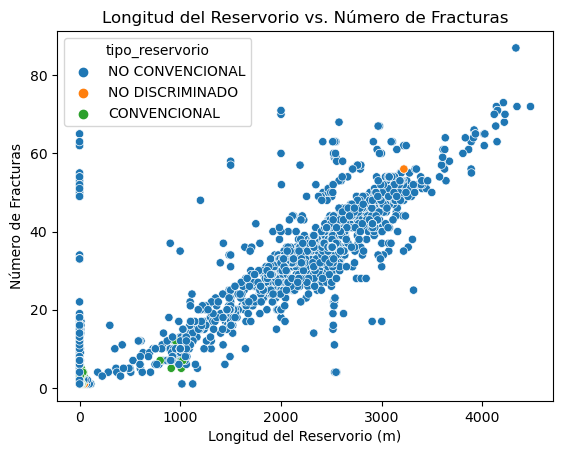

In [11]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=pozos, x='longitud_rama_horizontal_m', y='cantidad_fracturas', hue='tipo_reservorio')

# Añadir título y etiquetas de ejes
plt.title('Longitud del Reservorio vs. Número de Fracturas')
plt.xlabel('Longitud del Reservorio (m)')
plt.ylabel('Número de Fracturas')

# Mostrar el gráfico
plt.show()

De acuerdo con este gráfico, hay una correlación en la longitud del reservorio con respecto al número de fracturas. Con esta tendencia lineal, podemos estimar la frecuencia de fracturación, es decir, a qué distancia aproximada se espera que ocurra una fractura

Se observan valores de longitud del reservorio iguales a 0, lo cual no tiene sentido, probablemente debido a la falta de registro de esos datos. Existen dos maneras de abordar este problema:


Dado que se presenta una tendencia lineal, se podrían reasignar los valores de longitud del reservorio siguiendo dicha tendenci
a.
Otra opción es eliminar estos valores, ya que son pocos y no tienen un peso significativo en el análiststos

Por otro lado, en los tipos de reservorio, el mayor el numero de datos son del tipo 'no convencional', por lo que es conveniente separar los graficos por tipo de categoría para tener una mejor visualización

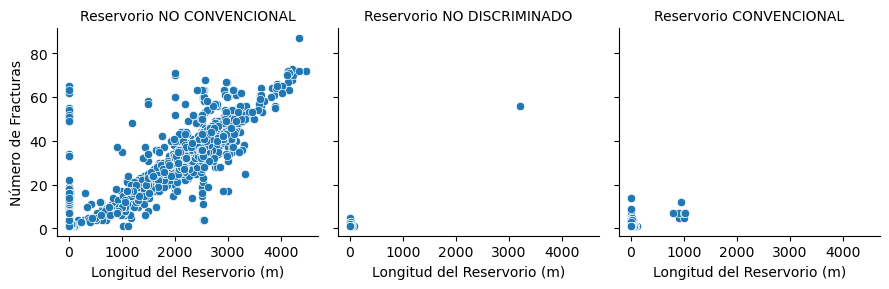

In [12]:
# Crear un FacetGrid con Seaborn
g = sns.FacetGrid(pozos, col='tipo_reservorio')
g.map_dataframe(sns.scatterplot, x='longitud_rama_horizontal_m', y='cantidad_fracturas')

# Ajustar las etiquetas de los ejes y el título
g.set_axis_labels('Longitud del Reservorio (m)', 'Número de Fracturas')
g.set_titles('Reservorio {col_name}')

# Mostrar los gráficos
plt.show()

Cual sería la relación de la cantidad de fracturas con los subtipos de reservorio, en este caso los de la categoria no aplica, corresponden a los reservorios de tipo convencional 

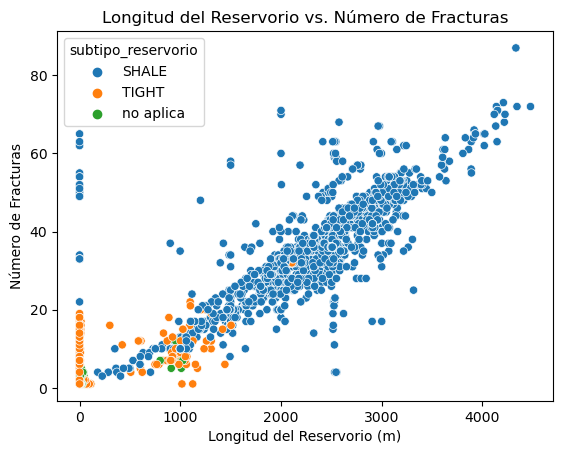

In [27]:
# Crear el gráfico de dispersión con Seaborn
sns.scatterplot(data=pozos, x='longitud_rama_horizontal_m', y='cantidad_fracturas', hue='subtipo_reservorio')

# Añadir título y etiquetas de ejes
plt.title('Longitud del Reservorio vs. Número de Fracturas')
plt.xlabel('Longitud del Reservorio (m)')
plt.ylabel('Número de Fracturas')

# Mostrar el gráfico
plt.show()

El mayor numero de datos corresponde al subtipo shale, por lo que al igual que la relación anterior (tipo de resevorio vs numero de fracturas), se separarán los gráficos para tener una visualización.

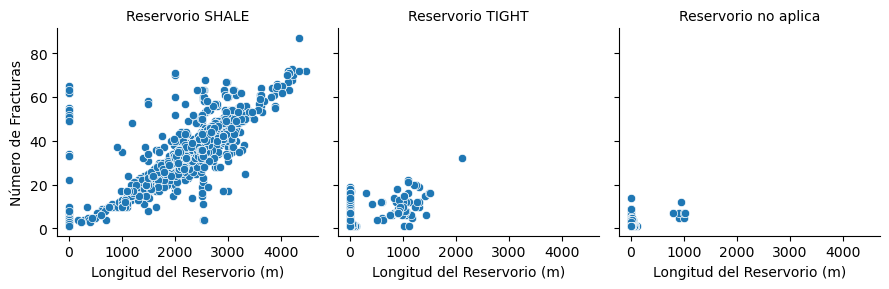

In [29]:
# Crear un FacetGrid con Seaborn
g = sns.FacetGrid(pozos, col='subtipo_reservorio')
g.map_dataframe(sns.scatterplot, x='longitud_rama_horizontal_m', y='cantidad_fracturas')

# Ajustar las etiquetas de los ejes y el título
g.set_axis_labels('Longitud del Reservorio (m)', 'Número de Fracturas')
g.set_titles('Reservorio {col_name}')

# Mostrar los gráficos
plt.show()

De estos gráficos se puede ver que los subtipos de reservorios shale son los que más se han enontrado. Además son de mayor longitud por lo que presentan un mayor numero de fractura.